In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("E:/ML Resources/Implementation/Hourly_data.csv")
data.head()

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
0,4.70,5.700,88.50,43.510,7.730,30.460,3.70
1,5.55,5.785,89.80,43.520,7.755,30.420,1.90
2,5.30,5.735,89.00,43.650,7.755,30.340,2.75
3,5.60,5.665,87.70,43.760,7.755,30.175,2.50
4,5.80,5.775,89.65,44.295,7.785,30.185,4.65


In [5]:
data.describe()

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
count,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000,39958.000000
mean,6.300544,6.648978,91.101502,37.817511,7.838370,24.367914,12.296035
std,4.386054,0.862679,10.987095,13.066689,0.175836,3.581589,25.350311
min,0.100000,3.960000,49.850000,0.087500,6.740000,16.150000,0.100000
25%,2.950000,6.095000,84.700000,33.970000,7.740000,20.995000,3.950000
50%,5.386980,6.605000,89.900000,43.510000,7.845000,24.715000,7.050000
75%,8.800000,7.120000,96.100000,46.695000,7.945000,27.500000,11.250000
max,34.800000,13.880000,183.300000,50.960000,8.575000,32.630000,497.250000


In [7]:
data.shape

(39958, 7)

In [8]:
data.isna().sum()

Chloraphylla ugL    0
DO mg               0
DO Sat              0
EC mScm             0
pH                  0
Temp degC           0
Turbidity NTU       0
dtype: int64

Text(0.5, 1.0, 'pH')

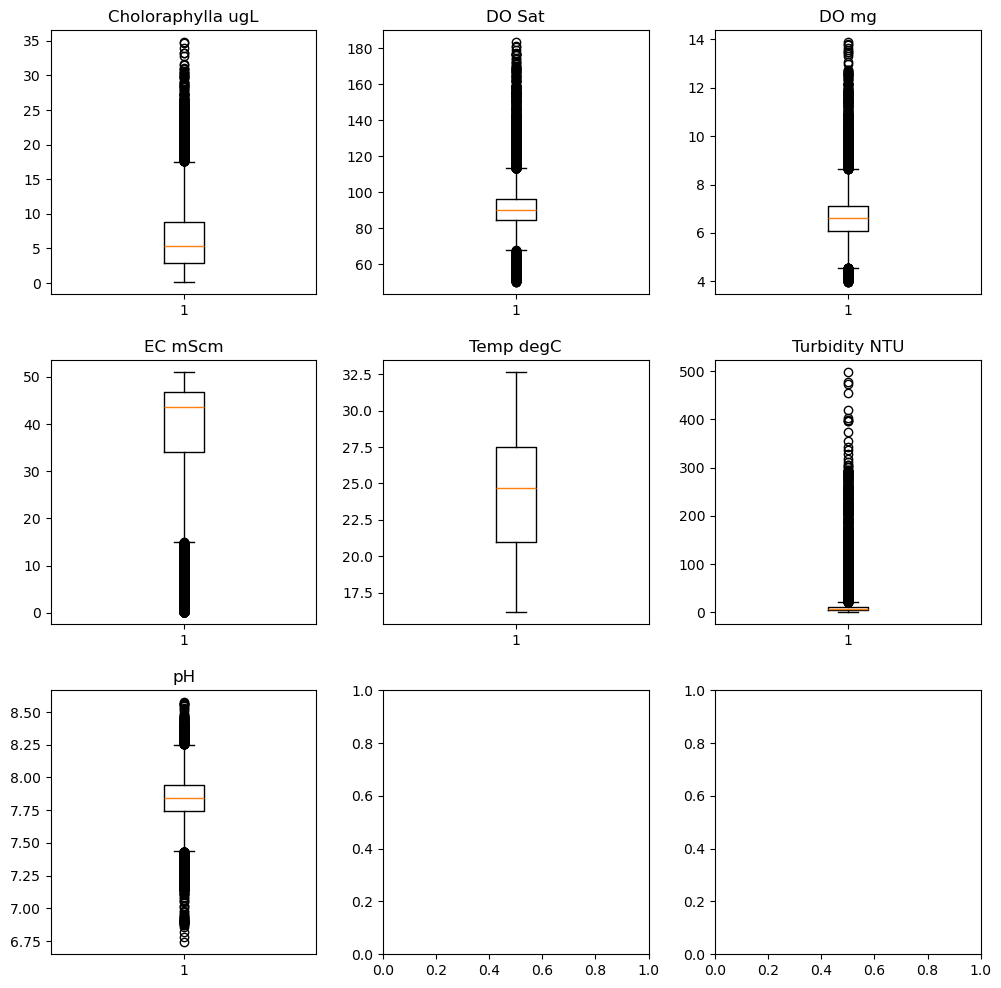

In [17]:
fig, ax = plt.subplots(3,3,figsize = (12,12))
fig.subplots_adjust(wspace = 0.25, hspace = 0.25)

ax[0][0].boxplot(data['Chloraphylla ugL'])
ax[0][0].set_title('Choloraphylla ugL')

ax[0][1].boxplot(data['DO Sat'])
ax[0][1].set_title('DO Sat')

ax[0][2].boxplot(data['DO mg'])
ax[0][2].set_title('DO mg')

ax[1][0].boxplot(data['EC mScm'])
ax[1][0].set_title('EC mScm')

ax[1][1].boxplot(data['Temp degC'])
ax[1][1].set_title('Temp degC')

ax[1][2].boxplot(data['Turbidity NTU'])
ax[1][2].set_title('Turbidity NTU')

ax[2][0].boxplot(data['pH'])
ax[2][0].set_title('pH')

In [19]:
for i in data.columns:
    dt = np.array(data[i])
    Q1=np.percentile(dt,25)
    Q3=np.percentile(dt,75)
    IQ = Q3-Q1
    upper = Q3+1.5*IQ
    lower = Q1-1.5*IQ

    dt[(dt[:]>upper) | (dt[:]<lower)] = np.nan 
    data[i]=dt

In [20]:
data.isna().sum()

Chloraphylla ugL     909
DO mg                876
DO Sat              1506
EC mScm             3773
pH                  1372
Temp degC              0
Turbidity NTU       3165
dtype: int64

In [21]:
data

,Chloraphylla ugL,DO mg,DO Sat,EC mScm,pH,Temp degC,Turbidity NTU
0,4.70,5.700,88.50,43.510,7.730,30.460,3.70
1,5.55,5.785,89.80,43.520,7.755,30.420,1.90
2,5.30,5.735,89.00,43.650,7.755,30.340,2.75
3,5.60,5.665,87.70,43.760,7.755,30.175,2.50
4,5.80,5.775,89.65,44.295,7.785,30.185,4.65
...,...,...,...,...,...,...,...
39953,10.05,7.490,NaN,48.550,7.875,27.610,8.10
39954,8.30,7.450,112.55,48.410,7.875,27.525,5.75
39955,7.30,7.450,112.65,48.660,7.900,27.525,4.55
39956,4.85,7.335,111.05,48.980,7.900,27.510,3.55


In [22]:
data = data.interpolate(method = 'linear', axis =0)
data.isna().sum()

Chloraphylla ugL    0
DO mg               0
DO Sat              0
EC mScm             0
pH                  0
Temp degC           0
Turbidity NTU       0
dtype: int64

Text(0.5, 1.0, 'pH')

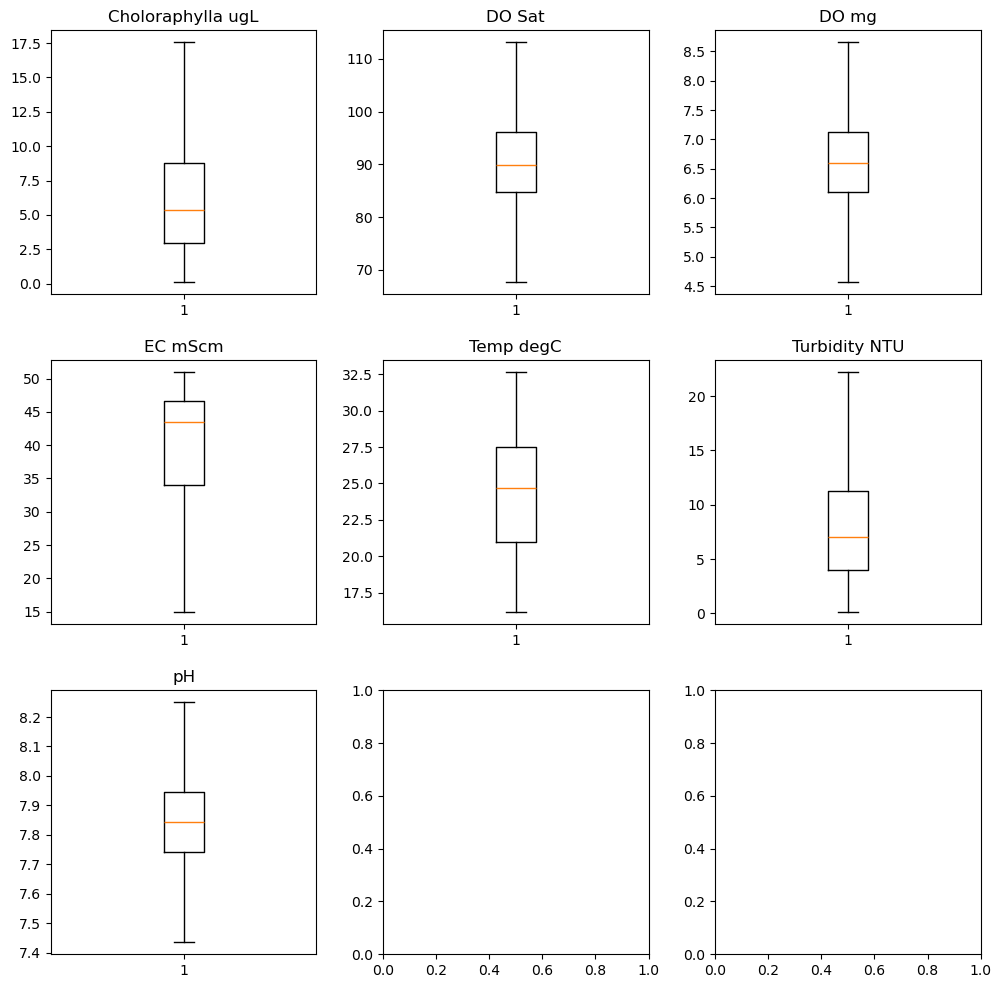

In [23]:
fig, ax = plt.subplots(3,3,figsize = (12,12))
fig.subplots_adjust(wspace = 0.25, hspace = 0.25)

ax[0][0].boxplot(data['Chloraphylla ugL'])
ax[0][0].set_title('Choloraphylla ugL')

ax[0][1].boxplot(data['DO Sat'])
ax[0][1].set_title('DO Sat')

ax[0][2].boxplot(data['DO mg'])
ax[0][2].set_title('DO mg')

ax[1][0].boxplot(data['EC mScm'])
ax[1][0].set_title('EC mScm')

ax[1][1].boxplot(data['Temp degC'])
ax[1][1].set_title('Temp degC')

ax[1][2].boxplot(data['Turbidity NTU'])
ax[1][2].set_title('Turbidity NTU')

ax[2][0].boxplot(data['pH'])
ax[2][0].set_title('pH')

Text(0.5, 1.0, 'Water Quality Data')

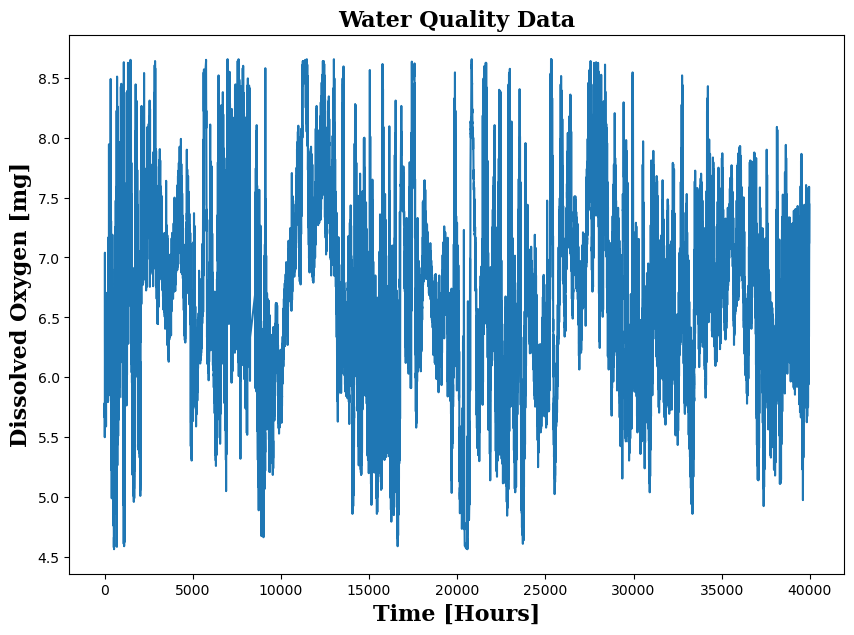

In [28]:
plt.figure(figsize =(10,7))
plt.plot(data['DO mg'])

plt.xlabel('Time [Hours]', fontsize =16, fontweight ='bold', fontfamily = 'serif')
plt.ylabel('Dissolved Oxygen [mg]', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
plt.title('Water Quality Data', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')

In [29]:
dt_arr = np.array(data)
dt_arr

array([[  4.7  ,   5.7  ,  88.5  , ...,   7.73 ,  30.46 ,   3.7  ],
       [  5.55 ,   5.785,  89.8  , ...,   7.755,  30.42 ,   1.9  ],
       [  5.3  ,   5.735,  89.   , ...,   7.755,  30.34 ,   2.75 ],
       ...,
       [  7.3  ,   7.45 , 112.65 , ...,   7.9  ,  27.525,   4.55 ],
       [  4.85 ,   7.335, 111.05 , ...,   7.9  ,  27.51 ,   3.55 ],
       [  3.8  ,   7.125, 107.95 , ...,   7.89 ,  27.485,   3.8  ]])

In [30]:
from sklearn.preprocessing import minmax_scale 
scaler = minmax_scale

In [31]:
for i in range(dt_arr.shape[1]):
    dt_arr[:,i] = scaler(dt_arr[:,i])

In [32]:
def create_dataset(data,time_window, label):
    X,Y=[],[]

    for i in range (len(data)-time_window-1):

        a = data[i:i+time_window, 0:data.shape[1]]
        X.append(a)
        Y.append(data[i+time_window,label])

    return(np.array(X), np.array(Y))

In [33]:
dt_train, dt_test = dt_arr[0:round(0.75*len(dt_arr))], dt_arr[round(0.75*len(dt_arr)):]

In [34]:
X_train,Y_train = create_dataset(dt_train, 100, 1)
X_test, Y_test = create_dataset(dt_test, 100, 1)

In [35]:
X_train.shape, Y_train.shape

((29867, 100, 7), (29867,))

In [36]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense

In [37]:
model = Sequential()
model.add(LSTM(100, activation= 'relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, 'linear'))
model.compile(optimizer ='adam', loss='mean_squared_error')

C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 0.0234
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0018
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0017
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0016
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0016
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0015
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0015
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0015
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.0014
Epoch 10/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.0014


In [39]:
Y_pred = model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [42]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
print('R-Squared:', r2_score(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_pred, Y_test))

R-Squared: 0.956880891698661
Mean squared error: 0.0008782015291964669


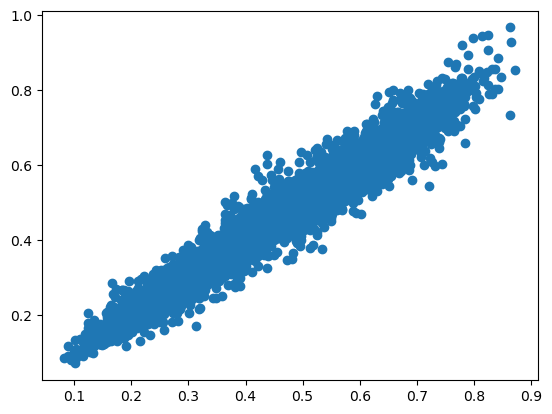

In [46]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred, Y_test)

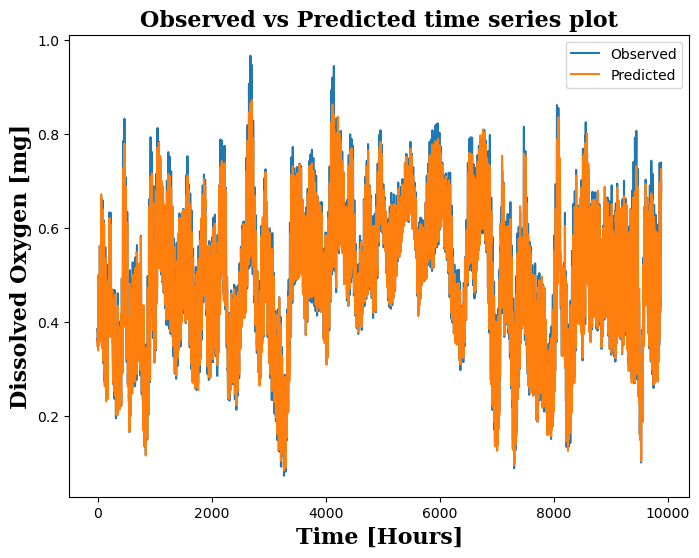

In [48]:
plt.figure(figsize=(8,6))
plt.plot(Y_test)
plt.plot(Y_pred)

plt.xlabel('Time [Hours]', fontsize =16, fontweight ='bold', fontfamily = 'serif')
plt.ylabel('Dissolved Oxygen [mg]', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
plt.title('Observed vs Predicted time series plot', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')
plt.legend(['Observed', 'Predicted'])

In [67]:
dtrain, dtest = dt_arr[0:round(0.75*len(dt_arr)),1], dt_arr[round(0.75*len(dt_arr)):,1]

Xtrain,Ytrain = create_dataset(dtrain[:,np.newaxis],100,0)
Xtest, Ytest=create_dataset(dtest[:,np.newaxis], 100,0)

In [68]:
Xtest.shape, Ytest.shape

((9889, 100, 1), (9889,))

In [69]:
model1 = Sequential()
model1.add(LSTM(100, activation = 'relu', input_shape = (Xtrain.shape[1], Xtrain.shape[2])))
model1.add(Dense(1,'linear'))
model1.compile(optimizer = 'adam', loss='mean_squared_error')

C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model1.fit(Xtrain, Ytrain, epochs = 10)

Epoch 1/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.0040
Epoch 2/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0017
Epoch 3/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0015
Epoch 4/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.0015
Epoch 5/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0014
Epoch 6/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0014
Epoch 7/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0013
Epoch 8/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0013
Epoch 9/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0013
Epoch 10/10
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0013


In [72]:
Ypredict = model1.predict(Xtest)

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [73]:
print('R-Squared:', r2_score(Y_test, Y_pred))
print('Mean squared error:', mean_squared_error(Y_pred, Y_test))

R-Squared: 0.956880891698661
Mean squared error: 0.0008782015291964669


In [74]:
import keras 
from keras import layers
import tensorflow as tf

In [75]:
def lstm_attention_model(input_shape):
    inputs = keras.Input(shape = input_shape)

    lstm = layers.LSTM(100, return_sequences = True)(inputs)
    
    attention = layers.Dense(1, activation = 'tanh')(lstm)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(100)(attention)
    attention = layers.Permute([2,1])(attention)
    attention = layers.Multiply()([lstm,attention])
    attention = layers.Lambda(lambda x: tf.reduce_sum(x, axis = 1))(attention)

    outputs = layers.Dense(1)(attention)
    model = keras.Model(inputs = inputs, outputs=outputs)
    model.compile(loss = 'mse', optimizer='adam')

    return model

In [76]:
model2 = lstm_attention_model(input_shape=(100,1))

In [77]:
model2.fit(Xtrain, Ytrain, epochs = 20)

Epoch 1/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 0.0235
Epoch 2/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.0110
Epoch 3/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.0061
Epoch 4/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0054
Epoch 5/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.0048
Epoch 6/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.0040
Epoch 7/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0039
Epoch 8/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0037
Epoch 9/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0034
Epoch 10/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0031
Epoch 11/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0028
Epoch 12/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0024
Epoch 13/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0021
Epoch 14/20
934/934 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.0020
Epoch 15/20
934/934 ━━━━━━━━━

In [78]:
Ypred = model2.predict(Xtest)

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [79]:
r2_score(Ytest, Ypred)

0.9579013594126501

In [3]:
def fib(n):
    if n ==1 or n == 0:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [6]:
fib(40)

165580141